In [2]:
import pandas as pd
import numpy as np #之后需要用到
import seaborn as sns
import matplotlib as mpl #设置环境变量
import matplotlib.pyplot as plt #绘图专用
mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['axes.unicode_minus']=False

#### 探究哪个用户群减少了

In [63]:
dau = pd.read_csv('./data/section4-dau.csv')
dau.head(5)

,log_date,app_name,user_id
0,2013-08-01,game-01,33754
1,2013-08-01,game-01,28598
2,2013-08-01,game-01,30306
3,2013-08-01,game-01,117
4,2013-08-01,game-01,6605


In [64]:
user_info = pd.read_csv('./data/section4-user_info.csv')
user_info.head(5)

,install_date,app_name,user_id,gender,generation,device_type
0,2013-04-15,game-01,1,M,40,iOS
1,2013-04-15,game-01,2,M,10,Android
2,2013-04-15,game-01,3,F,40,iOS
3,2013-04-15,game-01,4,M,10,Android
4,2013-04-15,game-01,5,M,40,iOS


In [65]:
dau_info = dau.merge(user_info, how='left', on=['user_id', 'app_name'])
dau_info.head()

,log_date,app_name,user_id,install_date,gender,generation,device_type
0,2013-08-01,game-01,33754,2013-08-01,M,20,iOS
1,2013-08-01,game-01,28598,2013-07-16,M,50,iOS
2,2013-08-01,game-01,30306,2013-07-20,F,30,iOS
3,2013-08-01,game-01,117,2013-04-17,F,20,iOS
4,2013-08-01,game-01,6605,2013-05-02,M,20,iOS


In [66]:
dau_info['log_month'] = pd.to_datetime(dau_info['log_date']).map(lambda x:x.strftime('%Y-%m'))

#### 以gender，generation，device_type三个属性，看数据在这三个属性的变化

In [102]:
dau_info_pivot = pd.pivot_table(dau_info,index='log_month',columns='gender',values='user_id',aggfunc=np.count_nonzero)
dau_info_pivot

gender,F,M
log_month,,
2013-08,47343,46842
2013-09,38027,38148


In [103]:
dau_info_pivot = pd.pivot_table(dau_info,index='log_month',columns='generation',values='user_id',aggfunc=np.count_nonzero)
dau_info_pivot

generation,10,20,30,40,50
log_month,,,,,
2013-08,18785,33671,28072,8828,4829
2013-09,15391,27229,22226,7494,3835


In [104]:
dau_info_pivot = pd.pivot_table(dau_info,index='log_month',columns='device_type',values='user_id',aggfunc=np.count_nonzero)
dau_info_pivot

device_type,Android,iOS
log_month,,
2013-08,46974,47211
2013-09,29647,46528


gender,F,M
log_month,,
2013-08,47343,46842
2013-09,38027,38148


In [72]:
new_dau = dau_info.groupby(['log_month', 'generation']).count().loc[:, ['user_id']]

In [73]:
count_generation = new_dau.rename(columns={'user_id': 'count'})

In [74]:
count_generation = pd.pivot_table(count_generation,index='log_month', columns='generation', values='count')
count_generation

generation,10,20,30,40,50
log_month,,,,,
2013-08,18785,33671,28072,8828,4829
2013-09,15391,27229,22226,7494,3835


In [105]:
dau_info_pivot = dau_info.pivot_table(index='log_month',columns=['gender','generation'],values='user_id',aggfunc=np.count_nonzero)
dau_info_pivot

gender         F                               M                          
generation    10     20     30    40    50    10     20     30    40    50
log_month                                                                 
2013-08     9091  17181  14217  4597  2257  9694  16490  13855  4231  2572
2013-09     7316  13616  11458  3856  1781  8075  13613  10768  3638  2054

In [107]:
dau_info_pivot = dau_info.pivot_table(
    index='log_month', columns='device_type', values='user_id', aggfunc=np.count_nonzero)
dau_info_pivot

device_type,Android,iOS
log_month,,
2013-08,46974,47211
2013-09,29647,46528


明显看出设备在Android属性上明显减少   

In [ ]:
探究数量在Android，ios在时间序列上的变化

In [82]:
dau_info_pivot = dau_info.pivot_table(index='log_date', columns='device_type', values='user_id', aggfunc=np.count_nonzero)

In [97]:
x =dau_info_pivot.index

In [92]:
y1 = dau_info_pivot.Android
y2 = dau_info_pivot.iOS

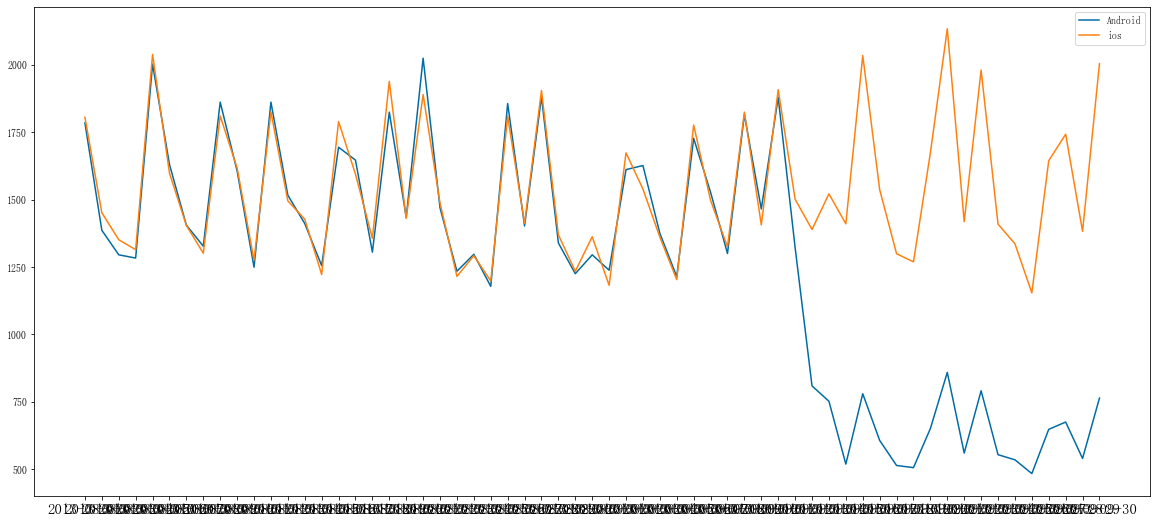

In [111]:
plt.figure(figsize=(20, 9))
plt.style.use("tableau-colorblind10")
plt.plot(x, y1, label='Android')
plt.plot(x, y2, label='ios')
plt.legend(loc='best')
plt.xticks(fontsize=20-5)
plt.show()

在9月第二周，Android用户明显减少